In [1]:
library(tidyverse)
library(readr)
library(fs)
library(magrittr)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract




In [2]:
setwd("/workspace/hraijc/Blueberry/Blueberry_trio/Assembly/BlobPlot_out")


In [3]:
p <- "/workspace/hraijc/Blueberry/Blueberry_trio/Assembly/BlobPlot_out"

# progeny_M7_hap1.rank_order.blobplot.progeny_M7_hap1.blobplot.blobDB.table.txt
# get a list of files
files <- dir_ls(p, glob = "*.blobplot.blobDB.table.txt")
# files

# read them in at once
# record paths in a column called filename
merged_blob <- read_delim(files, id = "filename", delim = '\t', comment = "#", col_names = c("name", "length", "GC", "N", "bam0", "phylum.t.6", "phylum.s.7", "phylum.c.8"))

Rows: 2269 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): name, phylum.t.6
dbl (6): length, GC, N, bam0, phylum.s.7, phylum.c.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [21]:
head(merged_blob)

filename,name,length,GC,N,bam0,phylum.t.6,phylum.s.7,phylum.c.8
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
/workspace/hraijc/Blueberry/Blueberry_trio/Assembly/BlobPlot_out/classified_M7_plus_unclassified_hap1.best_single.blobplot.classified_M7_plus_unclassified_hap1.best_single.blobplot.blobDB.table.txt,h1tg000002l_1,876223,0.3849,0,43.750,Streptophyta,2586,0
/workspace/hraijc/Blueberry/Blueberry_trio/Assembly/BlobPlot_out/classified_M7_plus_unclassified_hap1.best_single.blobplot.classified_M7_plus_unclassified_hap1.best_single.blobplot.blobDB.table.txt,h1tg000004l_1,3522377,0.3886,0,29.991,Streptophyta,2615,0
/workspace/hraijc/Blueberry/Blueberry_trio/Assembly/BlobPlot_out/classified_M7_plus_unclassified_hap1.best_single.blobplot.classified_M7_plus_unclassified_hap1.best_single.blobplot.blobDB.table.txt,h1tg000005l_1,242701,0.3809,0,25.162,Streptophyta,1050,0
/workspace/hraijc/Blueberry/Blueberry_trio/Assembly/BlobPlot_out/classified_M7_plus_unclassified_hap1.best_single.blobplot.classified_M7_plus_unclassified_hap1.best_single.blobplot.blobDB.table.txt,h1tg000006l_1,687127,0.3835,0,38.437,Streptophyta,1197,0
/workspace/hraijc/Blueberry/Blueberry_trio/Assembly/BlobPlot_out/classified_M7_plus_unclassified_hap1.best_single.blobplot.classified_M7_plus_unclassified_hap1.best_single.blobplot.blobDB.table.txt,h1tg000007l_1,2233150,0.3834,0,34.314,Streptophyta,2206,0
/workspace/hraijc/Blueberry/Blueberry_trio/Assembly/BlobPlot_out/classified_M7_plus_unclassified_hap1.best_single.blobplot.classified_M7_plus_unclassified_hap1.best_single.blobplot.blobDB.table.txt,h1tg000008l_1,994301,0.3910,0,40.231,Streptophyta,2488,0


In [4]:
merged_blob <- merged_blob %>% mutate(filename=basename(filename))

# Edit the filename to just have the first part
merged_blob <- separate(merged_blob,
                        filename,
                        sep = ".best_single",
                        c("Tag", NA))

Warning message:
"Expected 2 pieces. Additional pieces discarded in 2269 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...]."


In [20]:
tail(merged_blob,n=50)

Tag,name,length,GC,N,bam0,phylum.t.6,phylum.s.7,phylum.c.8
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
classified_Nui_plus_unclassified_hap2,h2tg000620l_1,3193139,0.3813,0,33.983,Streptophyta,2218.0,0
classified_Nui_plus_unclassified_hap2,h2tg000622l_1,267075,0.3774,0,36.289,Proteobacteria,1166.0,0
classified_Nui_plus_unclassified_hap2,h2tg000623l_1,88929,0.3733,0,49.387,Streptophyta,2495.0,0
classified_Nui_plus_unclassified_hap2,h2tg000624l_1,60327,0.4528,0,779.661,Streptophyta,16637.0,0
classified_Nui_plus_unclassified_hap2,h2tg000627l_1,374934,0.3943,0,33.976,Streptophyta,822.0,0
classified_Nui_plus_unclassified_hap2,h2tg000628l_1,51695,0.4539,0,886.001,Streptophyta,11633.0,0
classified_Nui_plus_unclassified_hap2,h2tg000630l_1,201112,0.4457,0,28.513,Streptophyta,612.0,0
classified_Nui_plus_unclassified_hap2,h2tg000631l_1,41300,0.4497,0,1154.180,Streptophyta,8346.0,0
classified_Nui_plus_unclassified_hap2,h2tg000633l_1,15236,0.3688,0,11.447,Streptophyta,132.0,0


In [24]:
unique(merged_blob$phylum.t.6)

[1] "Streptophyta"   "Proteobacteria" "no-hit"         "Bacteria-undef"
[5] "Arthropoda"

In [25]:
# Create a frequency table of unique values
value_counts <- table(merged_blob$phylum.t.6)

# Convert the frequency table to a data frame
value_counts_df <- as.data.frame(value_counts)

# Rename the columns to "Value" and "Count"
colnames(value_counts_df) <- c("Value", "Count")

# Print the data frame
print(value_counts_df)

           Value Count
1     Arthropoda     7
2 Bacteria-undef     5
3         no-hit    81
4 Proteobacteria   100
5   Streptophyta  2076


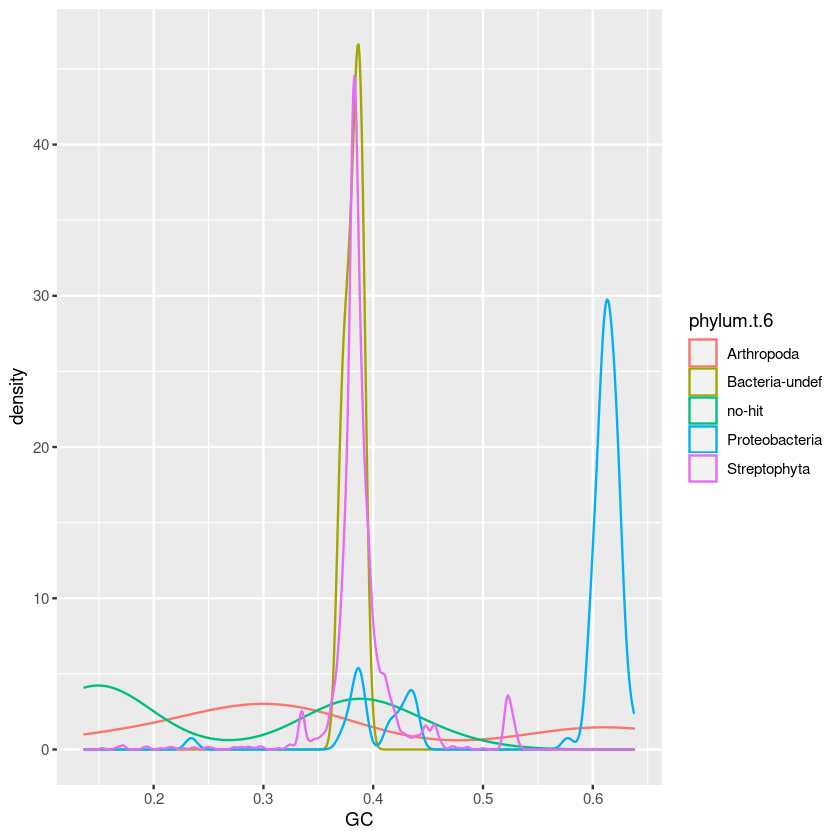

In [27]:
# Plot GC by phylum blasthit
c <- ggplot(merged_blob, aes(x = GC, color = phylum.t.6)) +
  geom_density(kernel = "gaussian") +
  scale_color_discrete()

print(c)

Warning message:
"Removed 109 rows containing non-finite values (stat_density)."


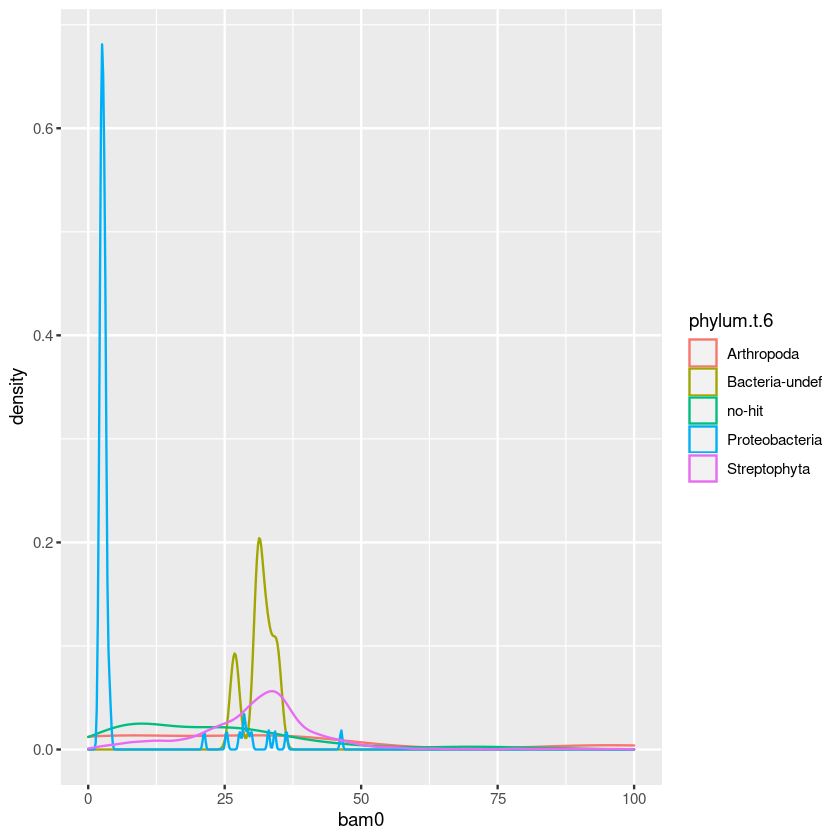

In [30]:
# Plot HiFi Coverage by phylum blasthit
c <- ggplot(merged_blob, aes(x = bam0, color = phylum.t.6)) +
  geom_density(kernel = "gaussian") +
  scale_color_discrete()+
  xlim(0, 100) 

print(c)

Warning message:
"Removed 109 rows containing missing values (geom_point)."


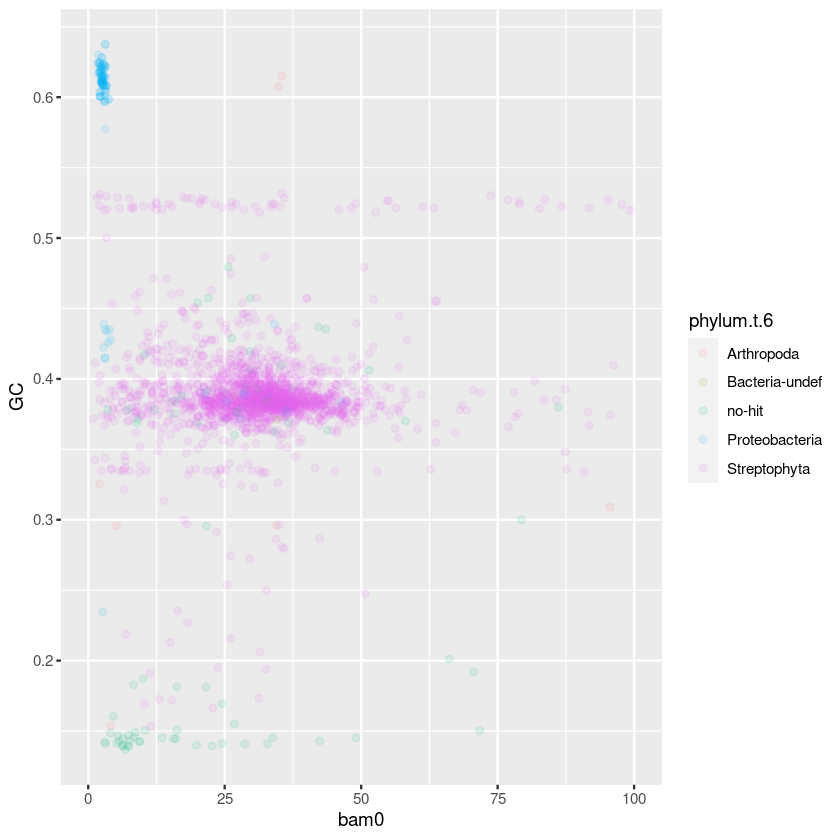

In [49]:

# Plot HiFi Coverage by GC phylum blasthit
c <- ggplot(merged_blob, aes(x = bam0, y=GC, color = phylum.t.6)) +
  geom_point(alpha=.1) +
  scale_color_discrete()+
  xlim(0, 100) 

print(c)

Warning message:
"Removed 109 rows containing missing values (geom_point)."


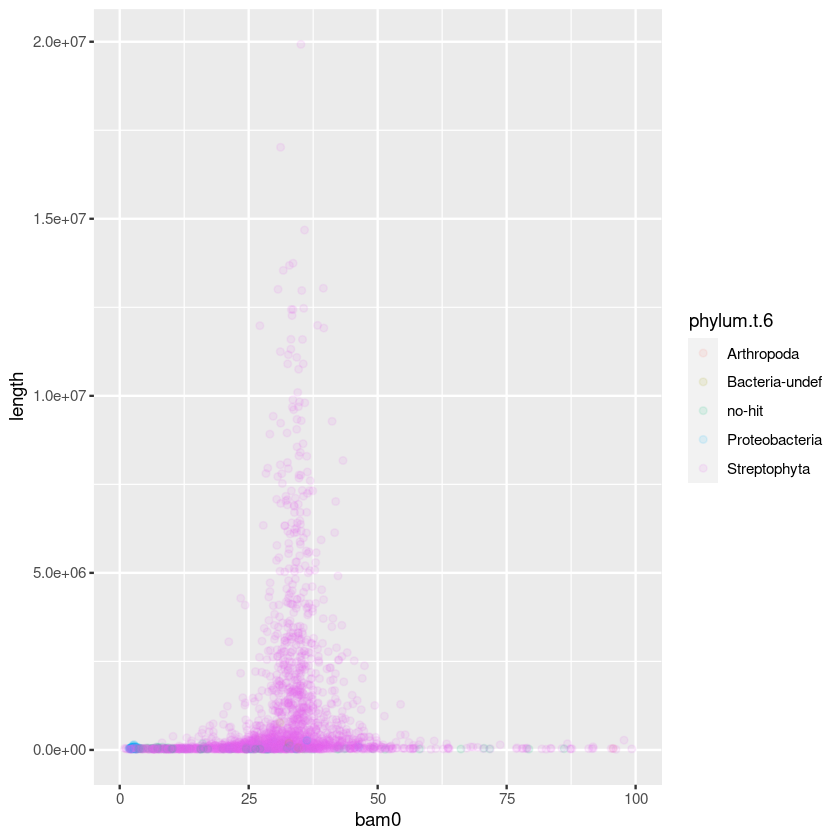

In [48]:

# Plot HiFi Coverage by Contig length, color phylum blasthit
c <- ggplot(merged_blob, aes(x = bam0, y=length, color = phylum.t.6)) +
  geom_point(alpha=.1) +
  scale_color_discrete()+
  xlim(0, 100) 

print(c)

Warning message:
"Removed 490 rows containing missing values (geom_point)."


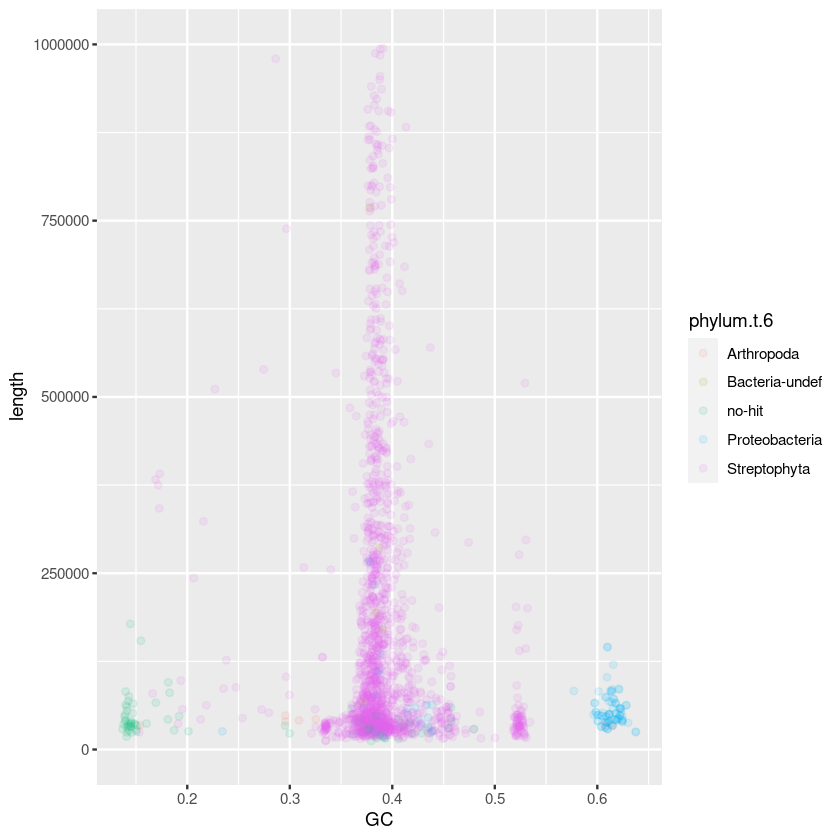

In [46]:
# Plot HiFi Coverage by GC, color phylum blasthit. Zoomed in. 
c <- ggplot(merged_blob, aes(x = GC, y=length, color = phylum.t.6)) +
  geom_point(alpha=.1) +
  scale_color_discrete() +
    ylim(0,1000000)

print(c)

In [9]:
## CUTOFFFS ###

## GC .3 -> .55
## Blast to streptyphyta


filtered_blob <- subset(merged_blob, GC > .3 & GC < .55 & phylum.t.6 == "Streptophyta")

## Contigs before filtering
nrow(merged_blob)
## Contigs after filtering
nrow(filtered_blob)



[1] 2269

[1] 2047

Warning message:
"Removed 486 rows containing missing values (geom_point)."


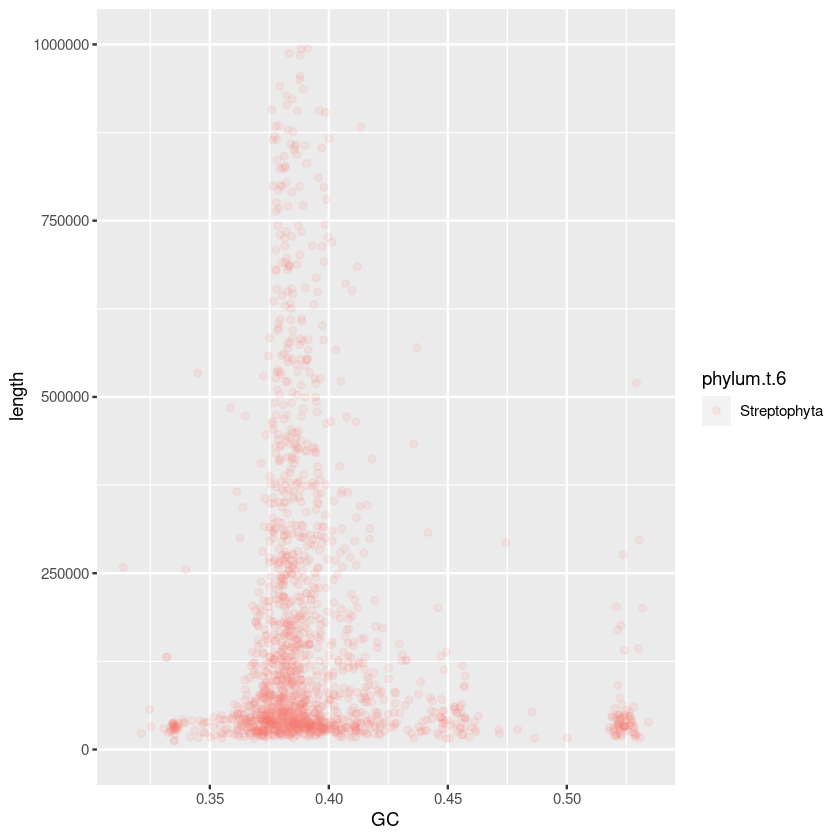

In [10]:
#Check Filtering worked
# Plot HiFi Coverage by GC, color phylum blasthit. Zoomed in. 
c <- ggplot(filtered_blob, aes(x = GC, y=length, color = phylum.t.6)) +
  geom_point(alpha=.1) +
  scale_color_discrete() +
    ylim(0,1000000)

print(c)

In [21]:
# Get unique values in the "Tag" column
unique_tags <- unique(filtered_blob$Tag)

# Loop through each unique Tag and write a TXT file
for (tag in unique_tags) {
  # Create a subset of the dataframe for the current Tag
  subset_df <- filtered_blob[filtered_blob$Tag == tag, "name"]

  # Generate a file name based on the current Tag
  file_name <- paste0(tag, "_clean_contigs.txt")
  
  # Write the subset to a TXT file
  write.table(subset_df, file = file_name, row.names = FALSE, col.names = FALSE, quote = FALSE)
}
